# Klasyfikacja siecią neuronową
Zbuduj sieć neuronową, która będzie działać jako klasyfikator dwuklasowy, wytrenuj ją na zbiorze train.csv. Sieć neuronowa powinna zawierać co najmniej jedną warstwę ukrytą, a na wyjściu powinna mieć sigmoid jako funkcję aktywacji. Wykorzystaj Keras/TensorFlow do implementacji sieci neuronowej. Oblicz macierz pomyłek na zbiorze danych test.csv. Wyświetl punkty ze zbioru test.csv na wykresie wraz z wykresem sieci neuronowej.
Wskazówka: wykorzystaj plt.contourf() i np.meshgrid() do generowania wykresu.

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import seaborn as sns

In [3]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
X_train, y_train = train[['x1','x2']].values, train[['t']].values
X_test, y_test = test[['x1','x2']].values, test[['t']].values

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
model = Sequential()
model.add(Dense(10, activation='relu', input_dim=2))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
model.fit(X_train, y_train, epochs=10, batch_size=10, verbose=True)

Epoch 1/10
80/80 [==============================] - 1s 6ms/step - loss: 0.4766 - accuracy: 0.9262
Epoch 2/10
80/80 [==============================] - 1s 6ms/step - loss: 0.1871 - accuracy: 0.9787
Epoch 3/10
80/80 [==============================] - 0s 6ms/step - loss: 0.0930 - accuracy: 0.9800
Epoch 4/10
80/80 [==============================] - 0s 6ms/step - loss: 0.0695 - accuracy: 0.9775
Epoch 5/10
80/80 [==============================] - 0s 6ms/step - loss: 0.0609 - accuracy: 0.9800
Epoch 6/10
80/80 [==============================] - 0s 6ms/step - loss: 0.0593 - accuracy: 0.9812
Epoch 7/10
80/80 [==============================] - 0s 6ms/step - loss: 0.0566 - accuracy: 0.9800
Epoch 8/10
80/80 [==============================] - 0s 6ms/step - loss: 0.0559 - accuracy: 0.9800
Epoch 9/10
80/80 [==============================] - 1s 6ms/step - loss: 0.0552 - accuracy: 0.9812
Epoch 10/10
80/80 [==============================] - 1s 6ms/step - loss: 0.0553 - accuracy: 0.9800


In [31]:
threshold = 0.5

7/7 [==============================] - 0s 17ms/step


<Axes: >

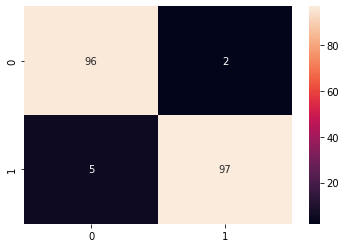

In [32]:
y_pred = (model.predict(X_test) > threshold).astype("int32")


conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True)


4710/4710 [==============================] - 9s 2ms/step


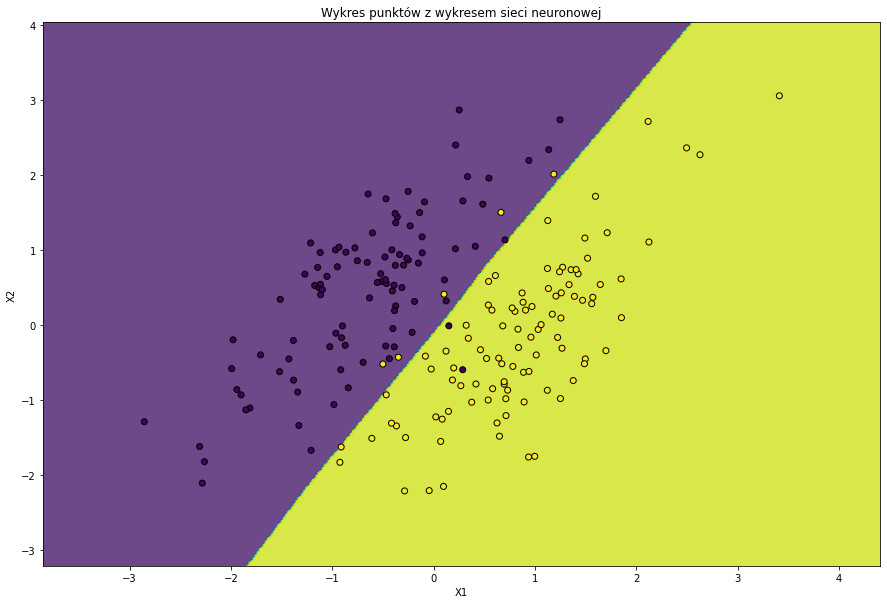

In [34]:
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

Z = (model.predict(np.c_[xx.ravel(), yy.ravel()]) > threshold).astype("int32")
Z = Z.reshape(xx.shape)
plt.figure(figsize=(15,10))
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Wykres punktów z wykresem sieci neuronowej')
plt.show()